In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
website = pd.read_csv('brainscore_table_website.csv')
finetune_all_layers = pd.read_csv('fine_tunned_all_layer_trained_all_new.csv')

In [4]:
ftn = finetune_all_layers

In [5]:
ftn

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,model,after training,before training,layer
0,0,0.0,0.0,0.0,0.0,DenseNet121,0.560547,0.500977,conv5_block15_concat
1,1,1.0,1.0,1.0,1.0,DenseNet169,0.568359,0.485352,pool4_pool
2,2,2.0,2.0,2.0,2.0,DenseNet201,0.569824,0.489746,pool4_pool
3,3,3.0,3.0,3.0,3.0,EfficientNetB0,0.554688,0.570312,block7a_project_bn
4,4,4.0,4.0,4.0,4.0,EfficientNetB0,0.533203,0.547852,top_conv
...,...,...,...,...,...,...,...,...,...
59,59,11.0,NaN,NaN,NaN,ResNet50V2,0.523438,0.515625,post_bn
60,60,12.0,NaN,NaN,NaN,VGG16,0.392334,0.560059,block4_pool
61,0,NaN,NaN,NaN,NaN,VGG16,0.560059,0.560059,block4_pool
62,1,NaN,NaN,NaN,NaN,VGG19,0.551270,0.548828,block4_pool


In [9]:
stats.spearmanr(ftn['after training'],ftn['before training'])

SpearmanrResult(correlation=0.4539970007051691, pvalue=0.00016456468107115796)

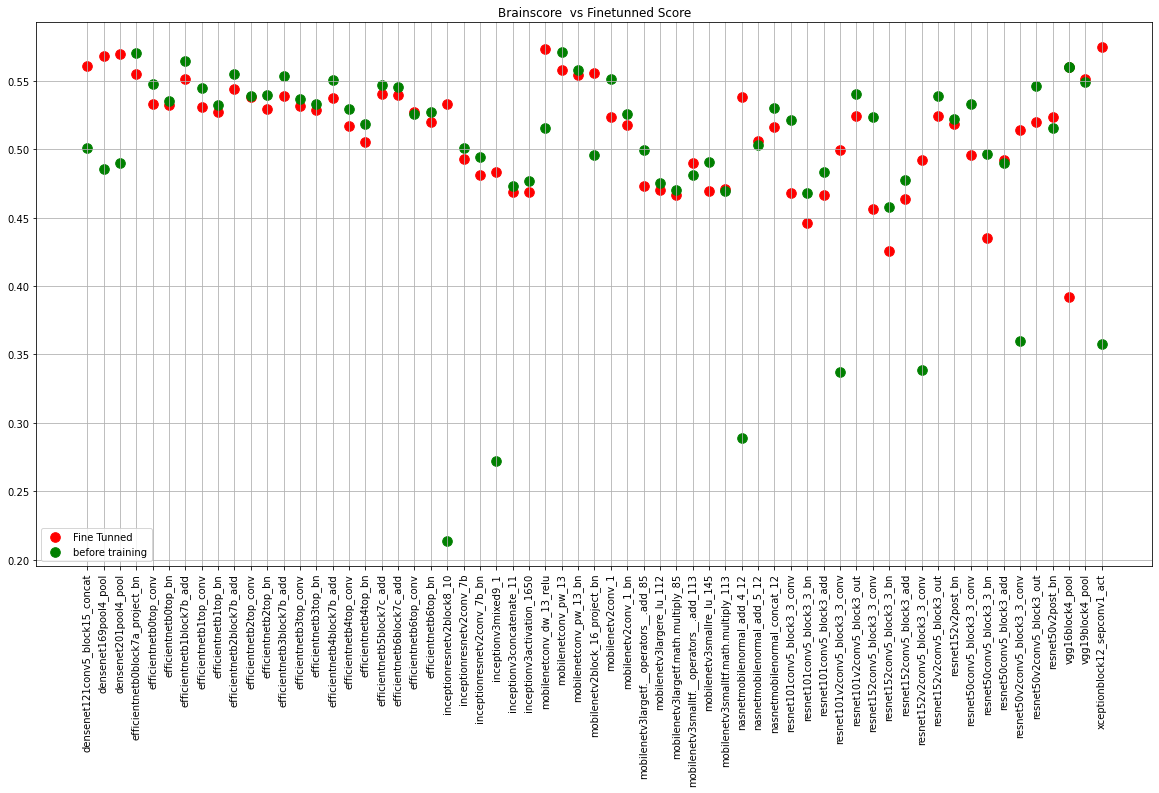

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
ftn['model_layer']= ftn.model +ftn.layer
x = [f.lower() for f in ftn.model_layer]

plt.scatter(x,ftn['after training'],color='r',s=92,label='Fine Tunned')
#plt.scatter(x,itdf['before training'],color='r')
plt.scatter(x,ftn['before training'],color='g',s=92, label='before training')
plt.xticks(rotation=90);
plt.title('Brainscore  vs Finetunned Score')
plt.grid() # horizontal lines
plt.legend()

In [42]:
finetune_all_layers =finetune_all_layers.drop(columns=['Unnamed: 0'])

In [7]:
finetune_all_layers.drop(finetune_all_layers.columns[finetune_all_layers.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [8]:
it_df = []
for m in finetune_all_layers.model.unique():
    samples = finetune_all_layers[finetune_all_layers['model']==m]
    samples.sort_values(by='before training')
    #samples = samples.drop(columns=['Unnamed: 0'])
    #print(samples)
    it_df.append(samples.values[-1])
itdf = pd.DataFrame(it_df,columns=['model','after training','before training','layer'])  

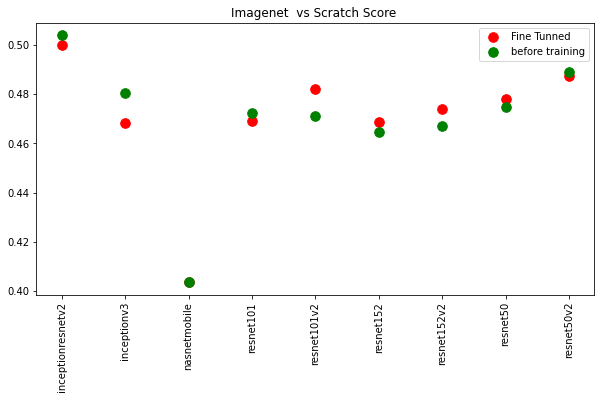

In [10]:
ftn =itdf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
x = [f.lower() for f in ftn.model]

plt.scatter(x,ftn['after training'],color='r',s=92,label='Fine Tunned')
#plt.scatter(x,itdf['before training'],color='r')
plt.scatter(x,ftn['before training'],color='g',s=92, label='before training')
plt.xticks(rotation=90);
plt.title('Imagenet  vs Scratch Score ')
plt.legend()

In [7]:
website['model'] = [ m.split(' ')[0].replace('-','') for m in website['Model \r\n submitted by'].tolist()]

In [8]:
select = [m for m in website['model'] for s in  itdf.model.tolist() if m.split('-')[0] in s.lower()]

In [9]:
select = np.unique(select)
itdf['model_name']=[it.lower() for it in itdf.model]

In [10]:
web = website.query('model in @select')
itdff = itdf.query('model_name in @select')

In [11]:
stats.spearmanr(web['MajajHong2015.IT-pls_v3'],itdff['after training'])

SpearmanrResult(correlation=0.042553388057604516, pvalue=0.9070828390046616)

In [12]:
stats.spearmanr(web['MajajHong2015.IT-pls_v3'],itdff['before training'])

SpearmanrResult(correlation=0.06686960980480709, pvalue=0.8543750609172778)

In [13]:
stats.spearmanr(web['MajajHong2015.IT-pls_v3'],web['MajajHong2015.IT-pls_v3'])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [14]:
stats.spearmanr(itdff['after training'],itdff['before training'])

SpearmanrResult(correlation=-0.5757575757575757, pvalue=0.08155281477260236)

In [16]:
website['model']

0                  voneresnet50robust
1                         VOneCORnetS
2          voneresnet50non_stochastic
3                        voneresnet50
4                             CORnetS
                    ...              
139    resnet18contrastive_predictive
140                           prednet
141               resnet18autoencoder
142                              hmax
143                            pixels
Name: model, Length: 144, dtype: object

In [17]:
ceil = 0.82
itdf['corrected before']= [(s/ceil) for s in itdf['before training']]
itdf['corrected after']= [(s/ceil) for s in itdf['after training']]

Text(0.5, 1.0, 'Brainscore website vs Finetunned Score')

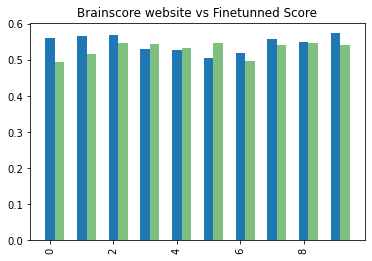

In [18]:
itdf = itdf.sort_values(by='after training')
import matplotlib.pyplot as plt
x = [f.lower() for f in itdff.model]
N =len(x)
ind = np.arange(N)
width = 0.3 
plt.bar(ind,itdff['after training'],width,)
#plt.scatter(x,itdf['before training'],color='r')
plt.bar(ind+width,web['MajajHong2015.IT-pls_v3'],width,color='g',alpha=0.5)
plt.xticks(rotation=90);
plt.title('Brainscore website vs Finetunned Score')

KeyError: 'before training'

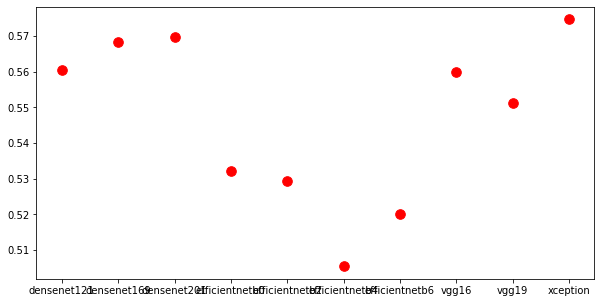

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
x = [f.lower() for f in itdff.model]

plt.scatter(x,itdff['after training'],color='r',s=92,label='Fine Tunned')
#plt.scatter(x,itdf['before training'],color='r')
plt.scatter(web.model,web['before training'],color='g',s=92, label='before training')
plt.xticks(rotation=90);
plt.title('Brainscore  vs Finetunned Score')
plt.legend()

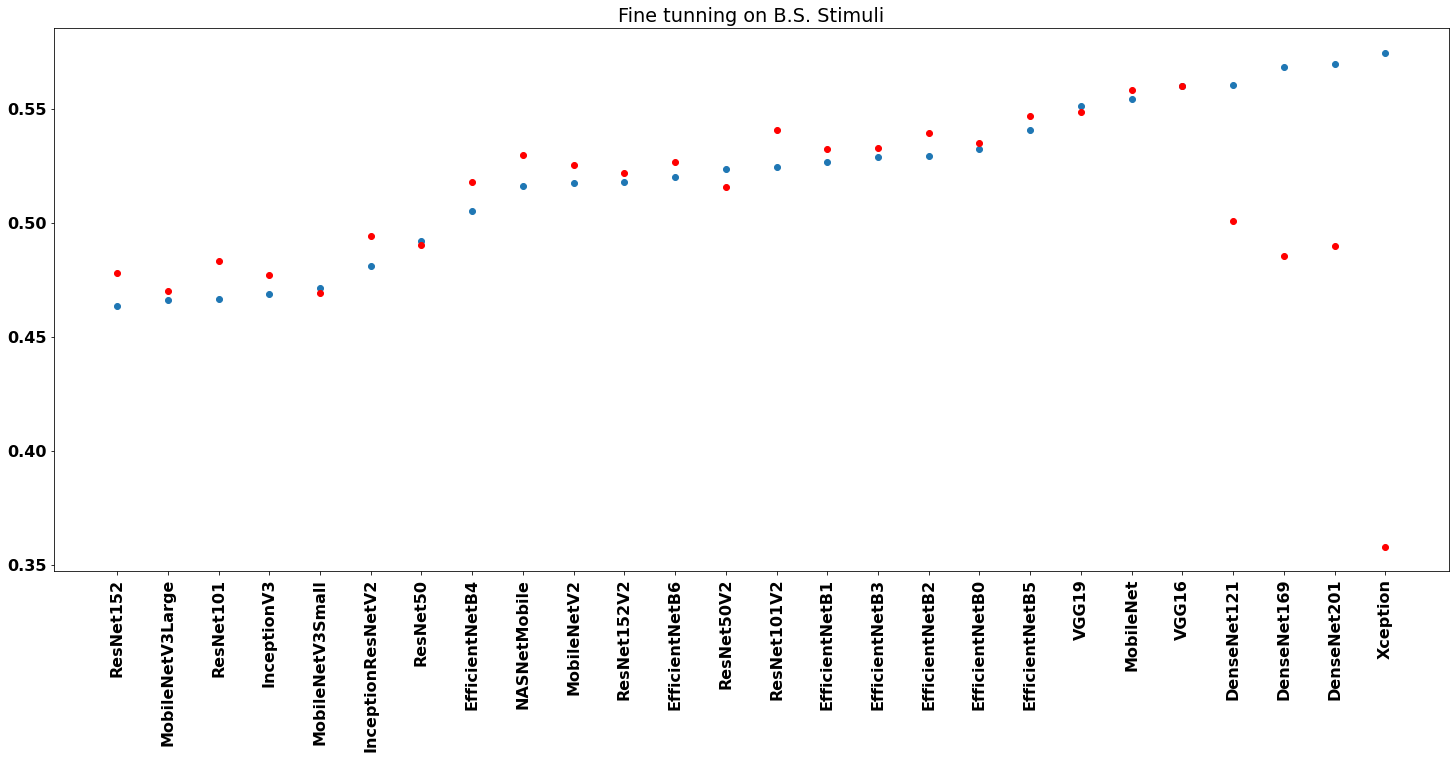

In [180]:
import matplotlib
font = {'family' : 'normal',
        
        'size'   : 16}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
x = [f.lower() for f in finetune_all_layers.model]

plt.scatter(itdf.model,itdf['after training'])
plt.scatter(itdf.model,itdf['before training'],color='r')
#plt.scatter(web.model,web['MajajHong2015.IT-pls_v3'],color='g')
plt.xticks(rotation=90);
plt.title('Fine tunning on B.S. Stimuli');

<AxesSubplot:>

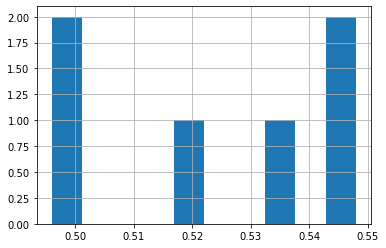

In [63]:
web['MajajHong2015.IT-pls_v3'].hist()

In [58]:
filter_ft['after training'].std()

0.017475876302581555

In [59]:
filter_ft['before training'].std()

0.0720520161713938

In [40]:
website = website.sort_values(by='MajajHong2015.IT-pls_v3')
webs = website[20:]

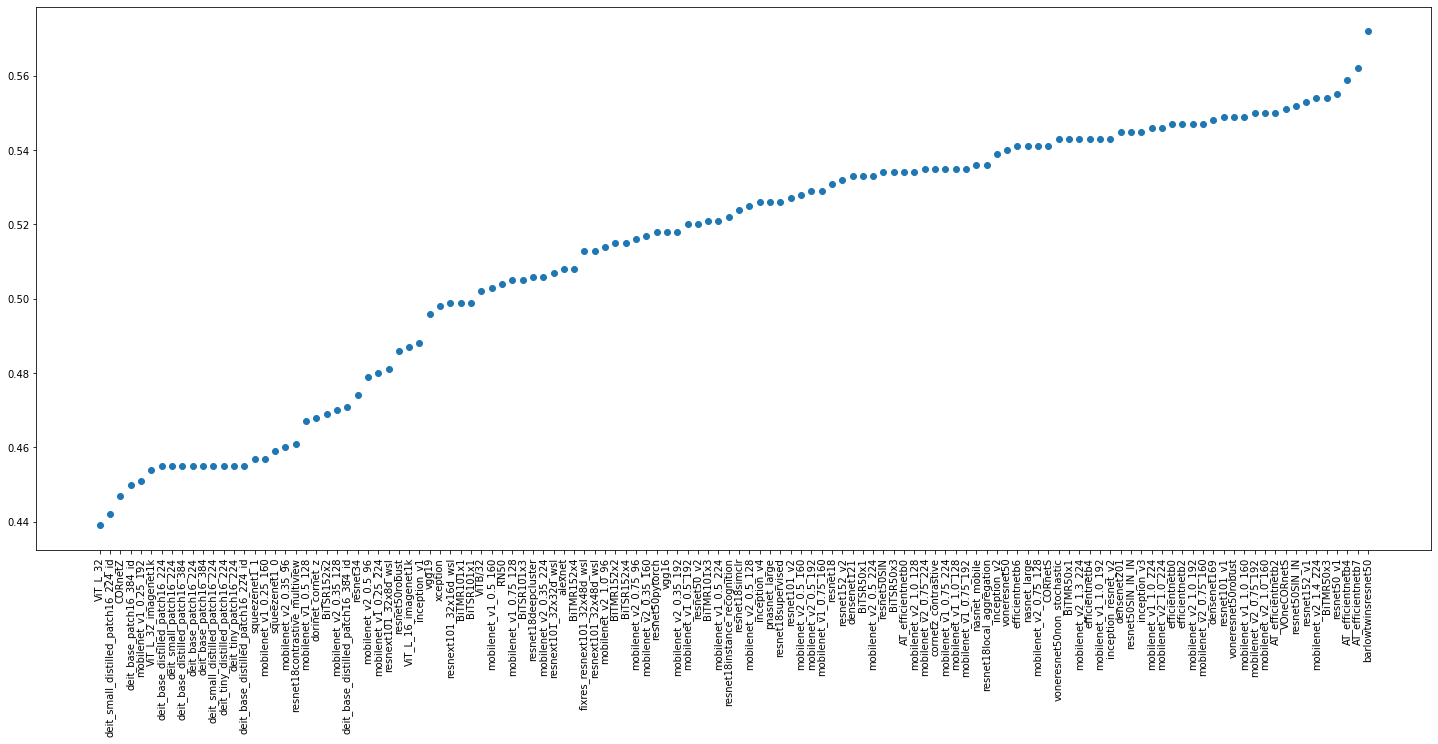

In [42]:
plt.rcParams['figure.figsize']=(25,10)
plt.scatter(webs['model'],webs['MajajHong2015.IT-pls_v3'])
plt.xticks(rotation=90);

Text(0, 0.5, 'Brainscore')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


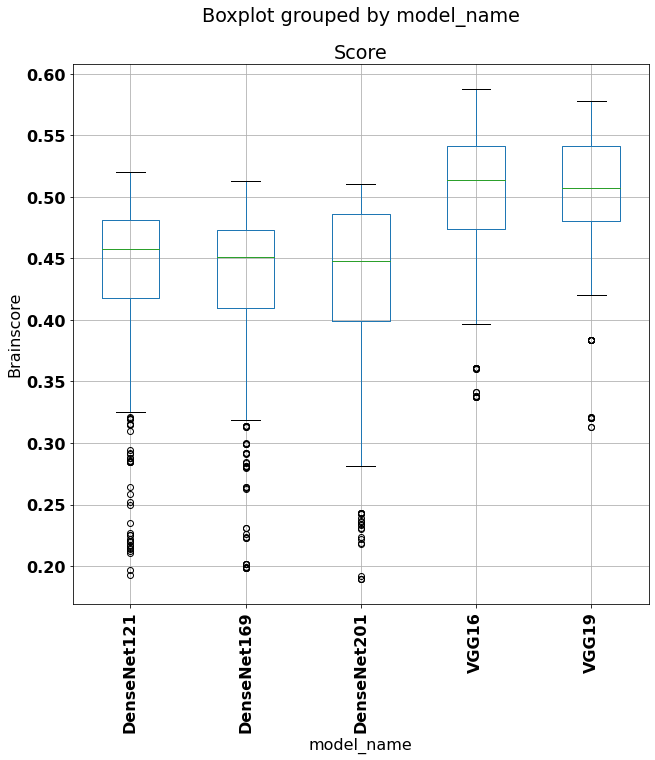

In [104]:
plsdata = pd.read_csv('PLS_DATA.csv') 
models = [ str(m.split(',')[0][2:-1]) for m in plsdata['Model'].tolist()]
plsdata['model_name']=models
plsdata.boxplot(by='model_name',column='Score',figsize=(10,10))
plt.xticks(rotation=90);
plt.ylabel('Brainscore')

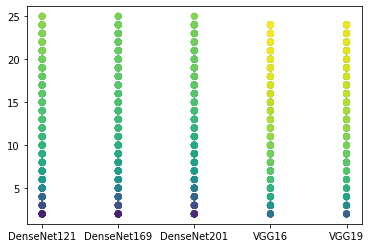

In [28]:
plt.scatter(plsdata.model_name,plsdata.Dimension, c=plsdata.Score)

In [29]:
plsdata.Dimension.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25])

DenseNet12         AxesSubplot(0.1,0.559091;0.363636x0.340909)
DenseNet16    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
DenseNet20             AxesSubplot(0.1,0.15;0.363636x0.340909)
VGG1              AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

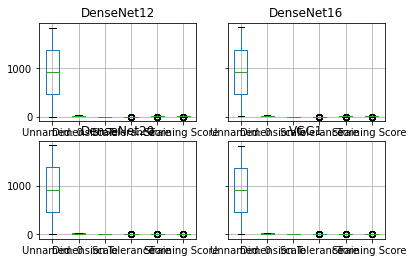

In [56]:
group.boxplot()

In [54]:
mm = plsdata.model_name.unique()

In [ ]:
for m in mm:
    plsdata[plsdata['model_name']==m]